# **Carregamento de documentos**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!sudo apt install build-essential libpoppler-cpp-dev pkg-config python3-dev -q

Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpoppler-cpp0v5
The following NEW packages will be installed:
  libpoppler-cpp-dev libpoppler-cpp0v5
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 36.7 kB of archives.
After this operation, 188 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp0v5 amd64 0.62.0-2ubuntu2.14 [28.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpoppler-cpp-dev amd64 0.62.0-2ubuntu2.14 [8,676 B]

In [4]:
!pip install pdftotext -q

     |████████████████████████████████| 113 kB 33.6 MB/s 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdftotext
import nltk
import glob
import re

In [6]:
#Instanciando stopwords e o stemmer
# nltk.download('stopwords')
nltk.download('all')

stopwords = nltk.corpus.stopwords.words('portuguese')

stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [7]:
# Adicionar mais palavras ao stopwords criado, verificando se já existe
new_stopwords = ['br', 'pág', 'listView', 'https', 'http', 
                 'numbr','numbrª', 'ª', 'nº']
print(len(stopwords))
for word in new_stopwords:
  if word not in stopwords:
    stopwords.append(word)
print(len(stopwords))

207
216


# **Importando os documentos de petição**

In [8]:
def transforma_dataframe(lista_arquivos, classe):
  lista_strings = []
  for peticao in lista_arquivos:
    with open(peticao, "rb") as f:
      pdf = pdftotext.PDF(f)
    lista_strings.append("\n\n".join(pdf))

  classificacao = []
  for i in range(len(lista_arquivos)):
    classificacao.append(classe)

  df = cria_dataframe(lista_arquivos, lista_strings, classificacao)
  return df

def cria_dataframe(lista_arquivos, lista_strings, classificacao):
  dicionario_peticao = {
    'nome_documento': lista_arquivos,
    'conteudo_peticao': lista_strings,
    'classificacao': classificacao,
  }
  
  df_peticao_inicial = pd.DataFrame(dicionario_peticao)
  return df_peticao_inicial

  

In [9]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/25 - APOSENTADORIA POR TEMPO DE CONTRIBUICAO/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_aposentadoria_tempo_contribuicao = transforma_dataframe(lista_arquivos, "aposentadoria_tempo_contribuicao")

In [10]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/28 - APOSENTADORIA URBANA/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_aposentadoria_urbana = transforma_dataframe(lista_arquivos, "aposentadoria_urbana")

In [11]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/28 - SALARIO MATERNIDADE RURAL/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_salario_maternidade_rural = transforma_dataframe(lista_arquivos, "salario_maternidade_rural")

In [12]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/29 - REVISIONAL FGTS/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_revisional_fgts = transforma_dataframe(lista_arquivos, "revisional_fgts")

In [13]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/35 - PENSAO POR MORTE/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_pensao_morte = transforma_dataframe(lista_arquivos, "pensao_morte")

In [14]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/45 - APOSENTADORIA IDADE RURAL/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_aposentadoria_idade_rural = transforma_dataframe(lista_arquivos, "aposentadoria_idade_rural")

In [15]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/48 - APOSENTADORIA ESPECIAL/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_aposentadoria_especial = transforma_dataframe(lista_arquivos, "aposentadoria_especial")

In [16]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/trf5.peticoes/65 - BENEFICIO ASSISTENCIAL - LOAS/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)

df_beneficio_assistencial_loas = transforma_dataframe(lista_arquivos, "beneficio_assistencial_loas")

In [17]:
# Concatenando os dataframes
df_peticoes_iniciais = pd.concat(
                                  [
                                  df_aposentadoria_tempo_contribuicao[:25], 
                                  df_aposentadoria_urbana[:25], 
                                  df_salario_maternidade_rural[:25],
                                  df_revisional_fgts[:25], df_pensao_morte[:25],
                                  df_aposentadoria_idade_rural[:25], 
                                  df_aposentadoria_especial[:25],
                                  df_beneficio_assistencial_loas[:25]
                                  ], 
                                 ignore_index=True
                                 )

In [18]:
# df_peticoes_iniciais['conteudo_peticao'].filter(items=[78], axis=0)

# **PLN**: Pré-processamento

In [19]:
df_peticoes_iniciais.head()

,nome_documento,conteudo_peticao,classificacao
0,/content/drive/MyDrive/trf5.peticoes/25 - APOS...,...,aposentadoria_tempo_contribuicao
1,/content/drive/MyDrive/trf5.peticoes/25 - APOS...,EXCELENTÍSSIMO DOUTOR JUIZ FEDERAL DA VA...,aposentadoria_tempo_contribuicao
2,/content/drive/MyDrive/trf5.peticoes/25 - APOS...,EXCELSO JUÍZO DA ___ VARA FEDERAL DA SEÇÃO JUD...,aposentadoria_tempo_contribuicao
3,/content/drive/MyDrive/trf5.peticoes/25 - APOS...,EXMO (A). SR. JUIZ FEDERAL DO JUIZADO ESPECIAL...,aposentadoria_tempo_contribuicao
4,/content/drive/MyDrive/trf5.peticoes/25 - APOS...,AO JUIZADO ESPECIAL FEDERAL ...,aposentadoria_tempo_contribuicao


In [20]:
# Verificando a distribuição de classe

print(df_peticoes_iniciais['classificacao'].value_counts())

aposentadoria_tempo_contribuicao    25
aposentadoria_urbana                25
salario_maternidade_rural           25
revisional_fgts                     25
pensao_morte                        25
aposentadoria_idade_rural           25
aposentadoria_especial              25
beneficio_assistencial_loas         25
Name: classificacao, dtype: int64


In [21]:
classificacao_peticoes = df_peticoes_iniciais['classificacao'].unique()

classificacao_peticoes_dicionario = {}
var = 0
for tipo_peticao in classificacao_peticoes:
  classificacao_peticoes_dicionario[tipo_peticao] = var
  var +=1


df_peticoes_iniciais['label_num'] = df_peticoes_iniciais['classificacao'].map(
    classificacao_peticoes_dicionario
)

label_ordinal_encoding = df_peticoes_iniciais[['classificacao','label_num']]
label_ordinal_encoding


,classificacao,label_num
0,aposentadoria_tempo_contribuicao,0
1,aposentadoria_tempo_contribuicao,0
2,aposentadoria_tempo_contribuicao,0
3,aposentadoria_tempo_contribuicao,0
4,aposentadoria_tempo_contribuicao,0
...,...,...
195,beneficio_assistencial_loas,7
196,beneficio_assistencial_loas,7
197,beneficio_assistencial_loas,7
198,beneficio_assistencial_loas,7


In [22]:
classificacao_peticoes_dicionario

{'aposentadoria_tempo_contribuicao': 0,
 'aposentadoria_urbana': 1,
 'salario_maternidade_rural': 2,
 'revisional_fgts': 3,
 'pensao_morte': 4,
 'aposentadoria_idade_rural': 5,
 'aposentadoria_especial': 6,
 'beneficio_assistencial_loas': 7}

In [23]:
def clean_text(text):
  text = str(text).lower()
  text = re.sub('https?://\S+|www\.\S+', 'webaddress', text) # Substitui URLs por 'webdress'
  text = re.sub('^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', text) # Substitui os endereços de e-mail por 'emailaddress'
  text = re.sub('£|\$|R\$', 'moneysymb', text) # Substitui os símbolos de dinheiro por 'moneysymb' 
  text = re.sub('^\(?[\d]{2}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumbr', text) # Substitui números de telefone de 10 dígitos (os formatos incluem parênteses, espaços, sem espaços, traços) por 'phonenumber'
  text = re.sub('\d+(\.\d+)?', '', text) # Substitua os números por 'numbr'
  text = re.sub('_{1,}', ' ', text) #Substitua os '_' por ' '
  text = re.sub('[^\w\d\s]', ' ', text) # Remover pontuação
  text = re.sub('\s+', ' ', text) # Substitui o espaço em branco entre os termos por um único espaço
  text = re.sub('^\s+|\s+?$', '', text) # Remova os espaços em branco iniciais e finais
  return text

def remove_stopwords(text):
  text = ' '.join(word for word in text.split(' ') if ((word not in stopwords) and (len(word) > 2 )))  # retira stopwords e palavras com menos de 3 letras
  return text

def stemming(text):
    palavras=[]
    for w in text.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

# def tokenizar(text):
#   tokenized_words = nltk.word_tokenize(text)
#   return tokenized_words 

In [24]:
df_peticoes_iniciais['text_clean'] = df_peticoes_iniciais['conteudo_peticao'].apply(clean_text)

df_peticoes_iniciais['text_clean'] = df_peticoes_iniciais['text_clean'].apply(remove_stopwords)


In [25]:
df_peticoes_iniciais['text_clean'] = df_peticoes_iniciais['text_clean'].apply(stemming)

In [26]:
# df_peticoes_iniciais['text_tokens'] = df_peticoes_iniciais['text_clean'].apply(tokenizar)

# df_peticoes_iniciais['text_tokens']


In [27]:
df_peticoes_iniciais[['conteudo_peticao', 'text_clean']] 

,conteudo_peticao,text_clean
0,...,centr empresar parthenon rua pedr oliv roch sa...
1,EXCELENTÍSSIMO DOUTOR JUIZ FEDERAL DA VA...,excelent dou juiz feder var feder ouricur trib...
2,EXCELSO JUÍZO DA ___ VARA FEDERAL DA SEÇÃO JUD...,excels juíz var feder seç judiciár caruaru açã...
3,EXMO (A). SR. JUIZ FEDERAL DO JUIZADO ESPECIAL...,exm juiz feder juiz espec feder subseç ouricur...
4,AO JUIZADO ESPECIAL FEDERAL ...,juiz espec feder caruaru trf erinald cavalc sa...
...,...,...
195,AO JUIZO DA 27ª VARA FEDERAL – JUIZADO ESPECIA...,juiz var feder juiz espec cível seç jud ciár p...
196,AO JUIZADO ESPECIAL FEDERAL – 27ª VARA –...,juiz espec feder var subseç judiciár ouricur s...
197,Justiça Federal da 5ª Região\n ...,justiç feder reg pje process judic eletrôn núm...
198,EXCELENTÍSSIMO(A) SENHOR(A) DOUTOR(A) JUIZ(A) ...,excelent senh dou juiz juiz espec feder ouricu...


# **Train test split**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_peticoes_iniciais.text_clean, 
    df_peticoes_iniciais.label_num, 
    test_size=0.20, # % de dados de teste
    random_state=2022,
    stratify=df_peticoes_iniciais.label_num
)

In [29]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (160,)
Shape of X_test:  (40,)


In [30]:
X_train.head()

173                                                icial
47     excelent senh dou juiz feder var juiz espec fe...
198    excelent senh dou juiz juiz espec feder ouricu...
63     meritiss juiz var juiz espec feder ouricur est...
114    excelent senh dou juiz feder var juiz espec cí...
Name: text_clean, dtype: object

In [31]:
y_train.value_counts()

6    20
1    20
7    20
2    20
4    20
3    20
0    20
5    20
Name: label_num, dtype: int64

In [32]:
y_test.value_counts()

6    5
0    5
3    5
2    5
7    5
5    5
4    5
1    5
Name: label_num, dtype: int64

# **Treinamento e Predição**

### **Tentativa 1**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as Petições. Observação:

use TF-IDF para pré-processar o texto.

usar **KNN** como o classificador

imprimir o relatório de classificação.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer


#1. Criar um objeto de pipeline
pipeline_vizinhos_proximos = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. Ajuste(fit) com X_train e y_train
pipeline_vizinhos_proximos.fit(X_train, y_train)
print(pipeline_vizinhos_proximos['vectorizer_tfidf'].transform(X_train).toarray())

print('---------------')

print(pipeline_vizinhos_proximos['vectorizer_tfidf'].vocabulary_)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.03218344 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01399639 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.03094196 0.         0.        ]]
---------------
{'icial': 2982, 'excelent': 2390, 'senh': 5705, 'dou': 1994, 'juiz': 3558, 'feder': 2538, 'var': 6387, 'espec': 2277, 'reg': 5301, 'seç': 5755, 'judiciár': 3555, 'pernambuc': 4689, 'subseç': 5920, 'caruaru': 928, 'amar': 305, 'manoel': 3881, 'silv': 5778, 'brasil': 784, 'conviv': 1406, 'serv': 5740, 'port': 4809, 'cédul': 1551, 'ident': 2991, 'sd': 5661, 'inscrit': 3282, 'cpf': 1465, 'sob': 5823, 'resid': 5417, 'domicili': 1975, 'rua': 5570, 'antôni': 384, 'delfin': 1656, 'souz': 5870, 'bairr': 672, 'nov': 4312, 'gravat': 2837, 'cep':

In [34]:
#3. Obter previsões para X_test e armazenar em y_pred
y_pred_vizinhosproximos = pipeline_vizinhos_proximos.predict(X_test)

In [35]:
# imprimir uma matriz de confusão e um relatório de classificação
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred_vizinhosproximos))

pd.DataFrame(
    confusion_matrix(y_test, y_pred_vizinhosproximos),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ])

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.00      0.00      0.00         5
           2       0.75      0.60      0.67         5
           3       0.83      1.00      0.91         5
           4       1.00      0.60      0.75         5
           5       0.40      0.80      0.53         5
           6       1.00      0.80      0.89         5
           7       0.40      0.80      0.53         5

    accuracy                           0.62        40
   macro avg       0.67      0.62      0.61        40
weighted avg       0.67      0.62      0.61        40



Previsto  \
                                         aposentadoria_tempo_contribuicao   
Amostra aposentadoria_tempo_contribuicao                                2   
        aposentadoria_urbana                                            0   
        salario_maternidade_rural                                       0   
        revisional_fgts                                                 0   
        pensao_morte                                                    0   
        aposentadoria_idade_rural                                       0   
        aposentadoria_especial                                          0   
        beneficio_assistencial_loas                                     0   

                                                               \
                                         aposentadoria_urbana   
Amostra aposentadoria_tempo_contribuicao                    0   
        aposentadoria_urbana                                0   
        salario_maternidade_rural                           0   
        revisional_fgts                                     0   
        pensao_morte                                        0   
        aposentadoria_idade_rural                           0   
        aposentadoria_especial                              1   
        beneficio_assistencial_loas                         0   

                                                                    \
                                         salario_maternidade_rural   
Amostra aposentadoria_tempo_contribuicao                         1   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                3   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                0   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                       \
                                         revisional_fgts pensao_morte   
Amostra aposentadoria_tempo_contribuicao               0            0   
        aposentadoria_urbana                           1            0   
        salario_maternidade_rural                      0            0   
        revisional_fgts                                5            0   
        pensao_morte                                   0            3   
        aposentadoria_idade_rural                      0            0   
        aposentadoria_especial                         0            0   
        beneficio_assistencial_loas                    0            0   

                                                                    \
                                         aposentadoria_idade_rural   
Amostra aposentadoria_tempo_contribuicao                         1   
        aposentadoria_urbana                                     1   
        salario_maternidade_rural                                1   
        revisional_fgts                                          0   
        pensao_morte                                             2   
        aposentadoria_idade_rural                                4   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              1   

                                                                 \
                                         aposentadoria_especial   
Amostra aposentadoria_tempo_contribuicao                      0   
        aposentadoria_urbana                                  0   
        salario_maternidade_rural                             0   
        revisional_fgts                                       0   
        pensao_morte                                          0   
        aposentadoria_idade_rural        

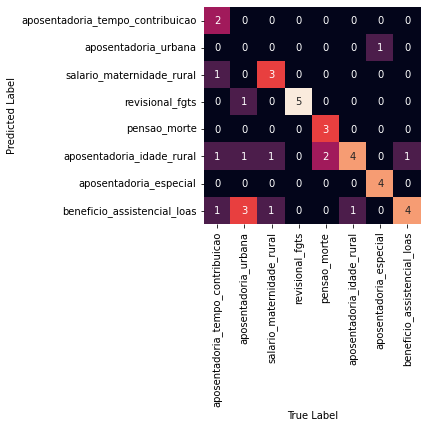

In [36]:
mat = confusion_matrix(y_test, y_pred_vizinhosproximos)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

### **Tentativa 2**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as petições. Observação:

use TF-IDF para pré-processar o texto.

use **Random Forest** como classificador.

imprimir o relatório de classificação.

In [37]:
from sklearn.ensemble import RandomForestClassifier

#1. Criar um objeto de pipeline
pipeline_random_forest = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),       
     ('Random Forest', RandomForestClassifier())         
])

#2. Ajuste(fit) com X_train e y_train
pipeline_random_forest.fit(X_train, y_train)


#3. Obter previsões para X_test e armazenar em y_pred
y_pred_rf = pipeline_random_forest.predict(X_test)

In [38]:
# imprimir uma matriz de confusão e um relatório de classificação
print(classification_report(y_test, y_pred_rf))

pd.DataFrame(
    confusion_matrix(y_test, y_pred_rf),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ])

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       0.83      1.00      0.91         5

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



Previsto  \
                                         aposentadoria_tempo_contribuicao   
Amostra aposentadoria_tempo_contribuicao                                4   
        aposentadoria_urbana                                            1   
        salario_maternidade_rural                                       0   
        revisional_fgts                                                 0   
        pensao_morte                                                    0   
        aposentadoria_idade_rural                                       0   
        aposentadoria_especial                                          0   
        beneficio_assistencial_loas                                     0   

                                                               \
                                         aposentadoria_urbana   
Amostra aposentadoria_tempo_contribuicao                    0   
        aposentadoria_urbana                                4   
        salario_maternidade_rural                           0   
        revisional_fgts                                     0   
        pensao_morte                                        0   
        aposentadoria_idade_rural                           0   
        aposentadoria_especial                              0   
        beneficio_assistencial_loas                         0   

                                                                    \
                                         salario_maternidade_rural   
Amostra aposentadoria_tempo_contribuicao                         0   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                5   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                0   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                       \
                                         revisional_fgts pensao_morte   
Amostra aposentadoria_tempo_contribuicao               0            0   
        aposentadoria_urbana                           0            0   
        salario_maternidade_rural                      0            0   
        revisional_fgts                                5            0   
        pensao_morte                                   0            4   
        aposentadoria_idade_rural                      0            0   
        aposentadoria_especial                         0            0   
        beneficio_assistencial_loas                    0            0   

                                                                    \
                                         aposentadoria_idade_rural   
Amostra aposentadoria_tempo_contribuicao                         0   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                0   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                5   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                 \
                                         aposentadoria_especial   
Amostra aposentadoria_tempo_contribuicao                      1   
        aposentadoria_urbana                                  0   
        salario_maternidade_rural                             0   
        revisional_fgts                                       0   
        pensao_morte                                          0   
        aposentadoria_idade_rural        

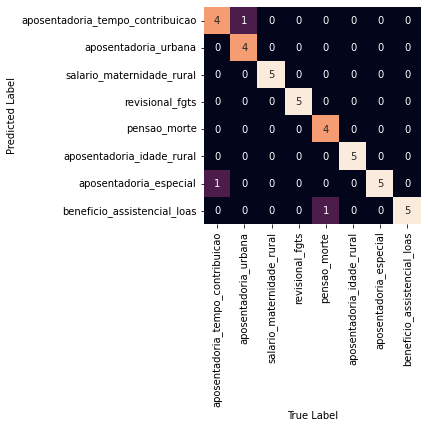

In [39]:
mat = confusion_matrix(y_test, y_pred_rf)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

### **Tentativa 3**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as petições. Observação:

use TF-IDF para pré-processar o texto.

use **SVM** como classificador.

imprimir o relatório de classificação.


In [40]:
from sklearn.svm import SVC

#1. Criar um objeto de pipeline
pipeline_svc = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('SVC', SVC(kernel = 'linear'))         
])

#2. Ajuste(fit) com X_train e y_train
pipeline_svc.fit(X_train, y_train)


#3. Obter previsões para X_test e armazenar em y_pred
y_pred_svm = pipeline_svc.predict(X_test)

In [41]:
# imprimir uma matriz de confusão e um relatório de classificação
print(classification_report(y_test, y_pred_svm))

pd.DataFrame(
    confusion_matrix(y_test, y_pred_svm),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ])

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       0.83      1.00      0.91         5

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



Previsto  \
                                         aposentadoria_tempo_contribuicao   
Amostra aposentadoria_tempo_contribuicao                                4   
        aposentadoria_urbana                                            1   
        salario_maternidade_rural                                       0   
        revisional_fgts                                                 0   
        pensao_morte                                                    0   
        aposentadoria_idade_rural                                       0   
        aposentadoria_especial                                          0   
        beneficio_assistencial_loas                                     0   

                                                               \
                                         aposentadoria_urbana   
Amostra aposentadoria_tempo_contribuicao                    0   
        aposentadoria_urbana                                4   
        salario_maternidade_rural                           0   
        revisional_fgts                                     0   
        pensao_morte                                        0   
        aposentadoria_idade_rural                           0   
        aposentadoria_especial                              0   
        beneficio_assistencial_loas                         0   

                                                                    \
                                         salario_maternidade_rural   
Amostra aposentadoria_tempo_contribuicao                         0   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                5   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                0   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                       \
                                         revisional_fgts pensao_morte   
Amostra aposentadoria_tempo_contribuicao               0            0   
        aposentadoria_urbana                           0            0   
        salario_maternidade_rural                      0            0   
        revisional_fgts                                5            0   
        pensao_morte                                   0            4   
        aposentadoria_idade_rural                      0            0   
        aposentadoria_especial                         0            0   
        beneficio_assistencial_loas                    0            0   

                                                                    \
                                         aposentadoria_idade_rural   
Amostra aposentadoria_tempo_contribuicao                         0   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                0   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                5   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                 \
                                         aposentadoria_especial   
Amostra aposentadoria_tempo_contribuicao                      1   
        aposentadoria_urbana                                  0   
        salario_maternidade_rural                             0   
        revisional_fgts                                       0   
        pensao_morte                                          0   
        aposentadoria_idade_rural        

In [44]:
print(classificacao_peticoes_dicionario)

{'aposentadoria_tempo_contribuicao': 0, 'aposentadoria_urbana': 1, 'salario_maternidade_rural': 2, 'revisional_fgts': 3, 'pensao_morte': 4, 'aposentadoria_idade_rural': 5, 'aposentadoria_especial': 6, 'beneficio_assistencial_loas': 7}


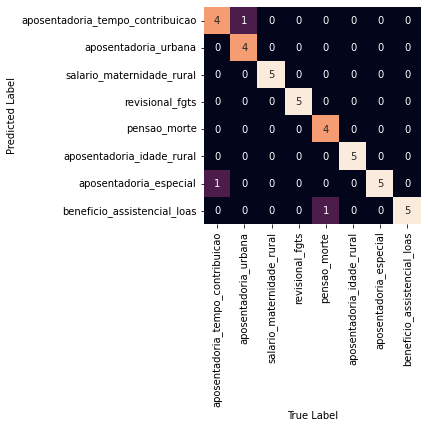

In [45]:
mat = confusion_matrix(y_test, y_pred_svm)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

In [46]:
# import numpy as np
# arr = np.array(y_test)
# print(arr)
# print(y_pred)

In [47]:
# y_test

In [63]:
classificacao_peticoes_dicionario


{'aposentadoria_tempo_contribuicao': 0,
 'aposentadoria_urbana': 1,
 'salario_maternidade_rural': 2,
 'revisional_fgts': 3,
 'pensao_morte': 4,
 'aposentadoria_idade_rural': 5,
 'aposentadoria_especial': 6,
 'beneficio_assistencial_loas': 7}

### **Tentativa 4**:

usando o módulo pipeline sklearn crie um pipeline de classificação para classificar as petições. Observação:

use TF-IDF para pré-processar o texto.

use **XGBoost** como classificador.

imprimir o relatório de classificação.


In [76]:
from xgboost import XGBClassifier

#1. Criar um objeto de pipeline
pipeline_xgboost = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('xgboost', XGBClassifier(
            learning_rate=0.09,
            n_estimators=500,
     ))         
])

#2. Ajuste(fit) com X_train e y_train
pipeline_xgboost.fit(X_train, y_train)


#3. Obter previsões para X_test e armazenar em y_pred
y_pred_xgboost = pipeline_xgboost.predict(X_test)

In [77]:
y_pred_xgboost

array([6, 0, 3, 2, 6, 3, 6, 7, 2, 5, 2, 4, 0, 3, 7, 5, 4, 0, 7, 5, 0, 7,
       5, 6, 4, 4, 2, 6, 1, 1, 6, 5, 1, 2, 7, 1, 0, 3, 3, 7])

In [78]:
# imprimir uma matriz de confusão e um relatório de classificação
print(classification_report(y_test, y_pred_xgboost))

pd.DataFrame(
    confusion_matrix(y_test, y_pred_xgboost),
    index = [
        ['Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra', 'Amostra'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ],
    columns = [
        ['Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto', 'Previsto'], 
        ['aposentadoria_tempo_contribuicao', 'aposentadoria_urbana', 'salario_maternidade_rural', 'revisional_fgts', 'pensao_morte', 'aposentadoria_idade_rural', 'aposentadoria_especial', 'beneficio_assistencial_loas']
             ])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.96      0.95      0.95        40



Previsto  \
                                         aposentadoria_tempo_contribuicao   
Amostra aposentadoria_tempo_contribuicao                                5   
        aposentadoria_urbana                                            0   
        salario_maternidade_rural                                       0   
        revisional_fgts                                                 0   
        pensao_morte                                                    0   
        aposentadoria_idade_rural                                       0   
        aposentadoria_especial                                          0   
        beneficio_assistencial_loas                                     0   

                                                               \
                                         aposentadoria_urbana   
Amostra aposentadoria_tempo_contribuicao                    0   
        aposentadoria_urbana                                4   
        salario_maternidade_rural                           0   
        revisional_fgts                                     0   
        pensao_morte                                        0   
        aposentadoria_idade_rural                           0   
        aposentadoria_especial                              0   
        beneficio_assistencial_loas                         0   

                                                                    \
                                         salario_maternidade_rural   
Amostra aposentadoria_tempo_contribuicao                         0   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                5   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                0   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                       \
                                         revisional_fgts pensao_morte   
Amostra aposentadoria_tempo_contribuicao               0            0   
        aposentadoria_urbana                           0            0   
        salario_maternidade_rural                      0            0   
        revisional_fgts                                5            0   
        pensao_morte                                   0            4   
        aposentadoria_idade_rural                      0            0   
        aposentadoria_especial                         0            0   
        beneficio_assistencial_loas                    0            0   

                                                                    \
                                         aposentadoria_idade_rural   
Amostra aposentadoria_tempo_contribuicao                         0   
        aposentadoria_urbana                                     0   
        salario_maternidade_rural                                0   
        revisional_fgts                                          0   
        pensao_morte                                             0   
        aposentadoria_idade_rural                                5   
        aposentadoria_especial                                   0   
        beneficio_assistencial_loas                              0   

                                                                 \
                                         aposentadoria_especial   
Amostra aposentadoria_tempo_contribuicao                      0   
        aposentadoria_urbana                                  1   
        salario_maternidade_rural                             0   
        revisional_fgts                                       0   
        pensao_morte                                          0   
        aposentadoria_idade_rural        

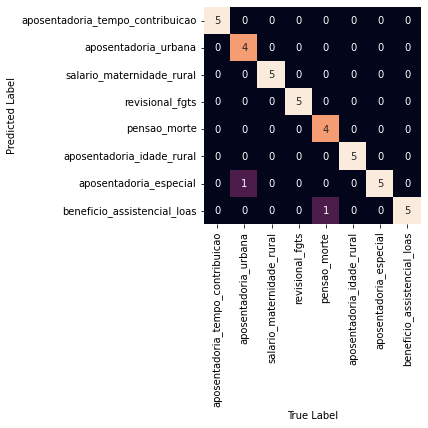

In [79]:
mat = confusion_matrix(y_test, y_pred_xgboost)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classificacao_peticoes_dicionario.keys()),yticklabels=list(classificacao_peticoes_dicionario.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

# **Utilizando Cross-Validation**

In [49]:
from sklearn.model_selection import KFold

validacao_cruzada = KFold(n_splits=5, shuffle=True, random_state=2022)
validacao_cruzada

KFold(n_splits=5, random_state=2022, shuffle=True)

In [50]:
# Acurácia média para Vizinhos mais próximos
from sklearn.model_selection import cross_val_score

acuracia_media_vp = cross_val_score(pipeline_vizinhos_proximos, df_peticoes_iniciais['text_clean'], df_peticoes_iniciais['label_num'], cv=validacao_cruzada)
print(acuracia_media_vp)
print(acuracia_media_vp.mean())

[0.45  0.55  0.55  0.575 0.6  ]
0.545


In [51]:
# acuracia_media_vp.mean()

In [52]:
# Acurácia média para random forest

acuracia_media_rf = cross_val_score(pipeline_random_forest, df_peticoes_iniciais.text_clean, df_peticoes_iniciais.label_num, cv=validacao_cruzada)
print(acuracia_media_rf)
print(acuracia_media_rf.mean())

[0.825 0.875 0.875 0.85  0.75 ]
0.8350000000000002


In [62]:
# Acurácia média para SVM

acuracia_media_svm = cross_val_score(pipeline_svc, 
                                     df_peticoes_iniciais.text_clean, 
                                     df_peticoes_iniciais.label_num, 
                                     cv=validacao_cruzada)
print(acuracia_media_svm)
print(acuracia_media_svm.mean())

[0.825 0.875 0.85  0.85  0.8  ]
0.8400000000000001


In [80]:
# Acurácia média para XGBoost

acuracia_media_xgboost = cross_val_score(pipeline_xgboost, 
                                     df_peticoes_iniciais.text_clean, 
                                     df_peticoes_iniciais.label_num, 
                                     cv=validacao_cruzada)
print(acuracia_media_xgboost)
print(acuracia_media_xgboost.mean())

[0.85  0.9   0.85  0.875 0.775]
0.85


In [56]:
y_train

173    6
47     1
198    7
63     2
114    4
      ..
90     3
12     0
6      0
127    5
154    6
Name: label_num, Length: 160, dtype: int64

In [58]:
df_peticoes_iniciais.loc[17]['nome_documento']

'/content/drive/MyDrive/trf5.peticoes/25 - APOSENTADORIA POR TEMPO DE CONTRIBUICAO/0005513-30.2022.4.05.8300.pdf'

# **Fazendo Upload de arquivos e realizando predição**

In [59]:
def predict_category(s, train=y_train,model=pipeline_svc):
    pred = model.predict([s])
    return pred

In [60]:
# # Fazer upload de petição
# from google.colab import files
# import io, pdftotext
# upload = files.upload()
# filename = list(upload.keys())[0]
# print(filename)

# with open(filename, "rb") as f:
#     pdf = pdftotext.PDF(f)

# texto_documento = "\n\n".join(pdf)
# texto_documento = texto_documento.lower()
# texto_documento = clean_text(texto_documento)
# texto_documento = remove_stopwords(texto_documento)
# #print(texto_documento)

# prediction_teste=predict_category(texto_documento)
# #print(prediction_teste)
# print('Esta petição é sugerida como...')
# if prediction_teste == [0]:
#   print('Aposentadoria por Tempo de Contribuição')
# elif prediction_teste == [1]:
#   print('Aposentadoria Urbana')
# elif prediction_teste == [2]:
#   print('Salario Maternidade Rural')
# elif prediction_teste == [3]:
#   print('Revisional Fgts')
# elif prediction_teste == [4]:
#   print('Pensao po Morte')
# elif prediction_teste == [5]:
#   print('Aposentadoria Idade Rural')
# elif prediction_teste == [6]:
#   print('Aposentadoria Especial')    
# elif prediction_teste == [7]:
#   print('Beneficio Assistencial Loas')   
# else:
#   print('Não identificado')
     

In [61]:
classificacao_peticoes_dicionario

{'aposentadoria_tempo_contribuicao': 0,
 'aposentadoria_urbana': 1,
 'salario_maternidade_rural': 2,
 'revisional_fgts': 3,
 'pensao_morte': 4,
 'aposentadoria_idade_rural': 5,
 'aposentadoria_especial': 6,
 'beneficio_assistencial_loas': 7}